# Linear Quantization - Theory and Examples
Author: Generated by ChatGPT

This notebook explains the complete theory of Linear Quantization with mathematical derivations and practical Python examples.

## 1. What is Quantization?
Quantization is the process of mapping high precision floating point values (e.g., float32) into lower precision discrete values (e.g., int8).

In Deep Learning, quantization is used to:
- Reduce model size
- Reduce memory usage
- Speed up inference
- Enable edge deployment

## 2. Linear Quantization Theory
Linear quantization assumes a linear mapping between float values and integer values.

### Core Equations

Forward mapping:
q = round(x / S + Z)

Dequantization:
x_hat = S (q - Z)

Where:
- S = scale
- Z = zero-point
- q = quantized integer
- x = original float value

## 3. Computing Scale and Zero-Point

For an integer range [q_min, q_max] and float range [x_min, x_max]:

Scale:
S = (x_max - x_min) / (q_max - q_min)

Zero-point:
Z = round(q_min - x_min / S)

## 4. Numerical Example (8-bit Quantization)
We quantize values in range [-1.0, 1.0] to int8 [-128, 127].

In [1]:
import numpy as np

# Define float range
x_min = -1.0
x_max = 1.0

# Define int8 range
q_min = -128
q_max = 127

# Compute scale
S = (x_max - x_min) / (q_max - q_min)

# Compute zero point
Z = round(q_min - x_min / S)

S, Z

(0.00784313725490196, 0)

### Quantize Sample Values

In [2]:
# Sample float values
x = np.array([-1.0, -0.5, 0.0, 0.5, 1.0])

# Quantization
q = np.round(x / S + Z)

# Dequantization
x_hat = S * (q - Z)

print('Original:', x)
print('Quantized:', q)
print('Dequantized:', x_hat)

Original: [-1.  -0.5  0.   0.5  1. ]
Quantized: [-128.  -64.    0.   64.  128.]
Dequantized: [-1.00392157 -0.50196078  0.          0.50196078  1.00392157]


## 5. Quantization Error

Quantization error:
error = x - x_hat

Maximum theoretical error is S/2.

In [3]:
error = x - x_hat
print('Error:', error)
print('Max theoretical error:', S/2)

Error: [ 0.00392157  0.00196078  0.         -0.00196078 -0.00392157]
Max theoretical error: 0.00392156862745098


## 6. Visualization of Linear Quantization
This plot shows how float values map to quantized levels.

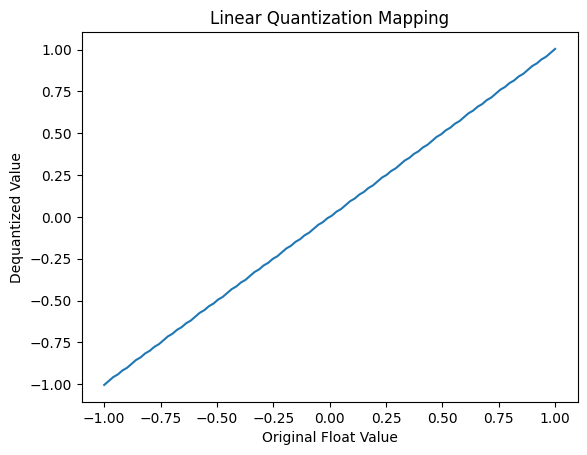

In [4]:
import matplotlib.pyplot as plt

# Generate continuous float values
x_cont = np.linspace(-1, 1, 100)
q_cont = np.round(x_cont / S + Z)
x_deq = S * (q_cont - Z)

plt.figure()
plt.plot(x_cont, x_deq)
plt.xlabel('Original Float Value')
plt.ylabel('Dequantized Value')
plt.title('Linear Quantization Mapping')
plt.show()

## 7. Symmetric vs Asymmetric Quantization

### Symmetric:
- Zero-point = 0
- Range symmetric around zero
- Mostly used for weights

### Asymmetric:
- Zero-point ≠ 0
- Better range utilization
- Mostly used for activations

## 8. Per-Tensor vs Per-Channel Quantization

Per-Tensor: Single scale for entire tensor.

Per-Channel: Separate scale per output channel.

Per-channel improves accuracy especially in CNNs and Transformers.

## 9. Summary

Linear Quantization:
- Uses uniform step size
- Simple and hardware friendly
- Introduces bounded error
- Forms the basis of modern model compression techniques